In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [14]:
data = pd.read_csv('data.csv')

### Data Exploration ###
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#info 
print(data.shape)
data.info()

(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

In [15]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
data.drop('Unnamed: 32', axis=1, inplace=True)

### DATA VISUALIZATION 

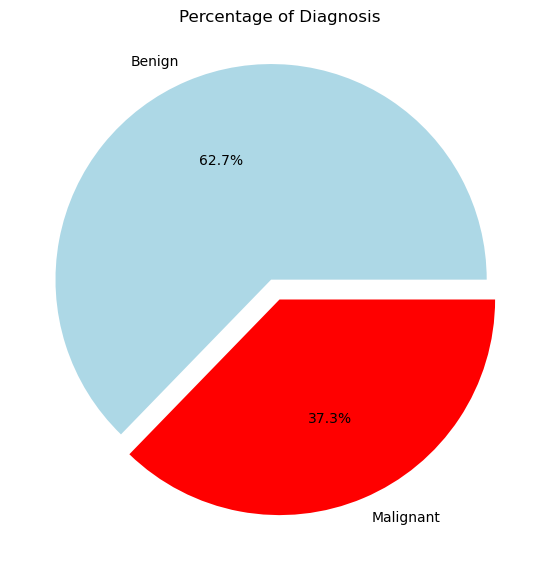

In [30]:
# draw a pie chart for the diagnosis
labels = ['Benign', 'Malignant']
sizes = data['diagnosis'].value_counts(sort = True)
colors = ["lightblue","red"]
explode = (0.1,0)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Diagnosis')
plt.show()

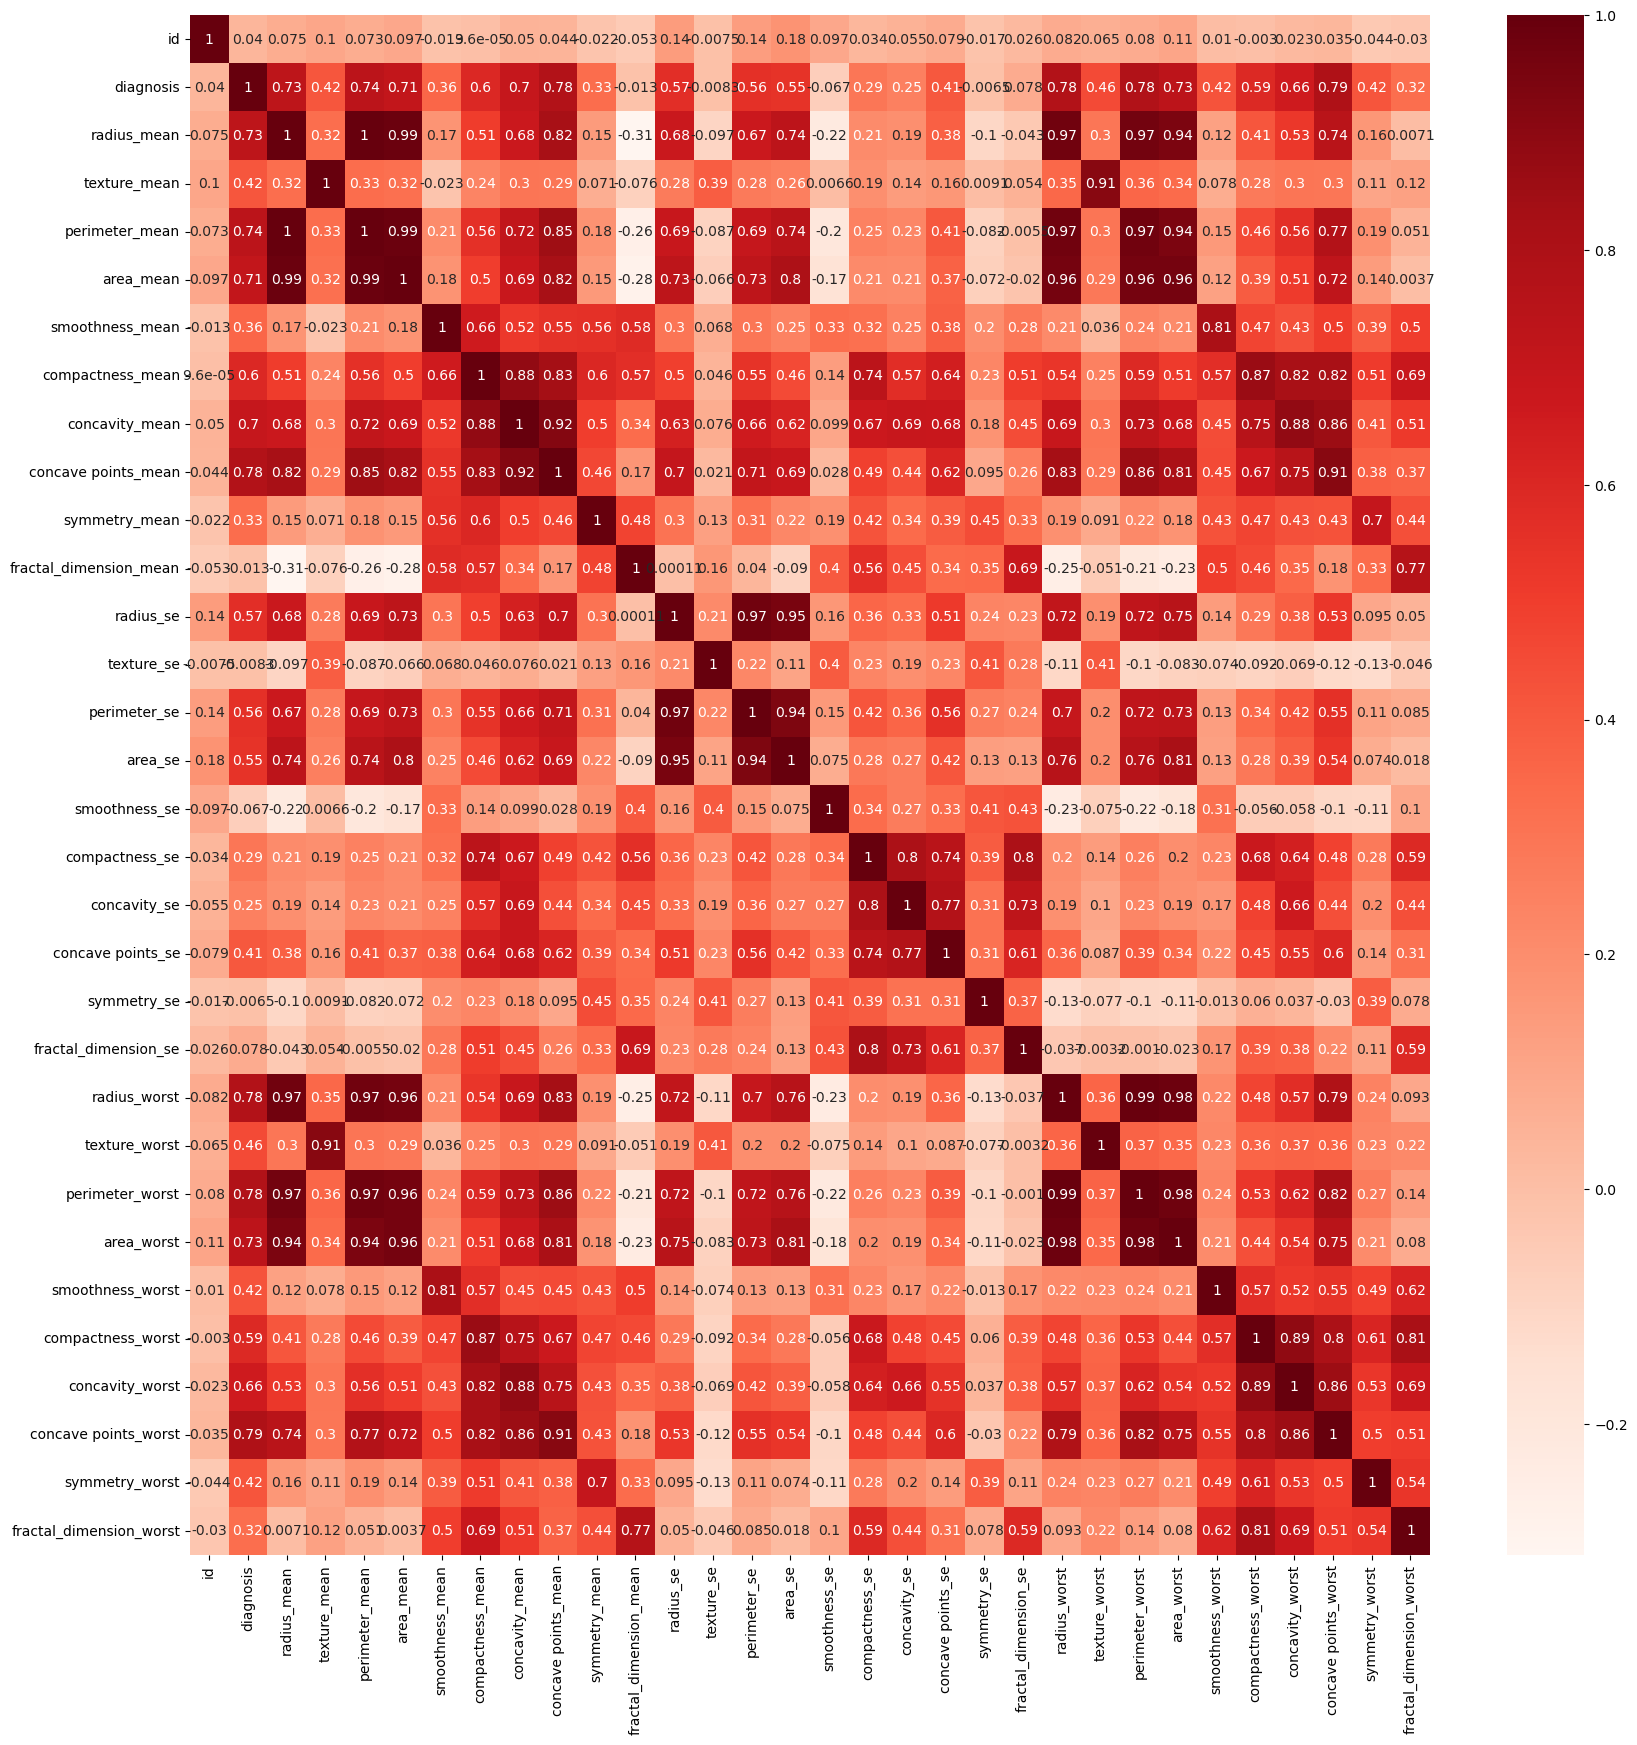

In [31]:
#draw the correlation matrix
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

### BUILDING THE MODEL

In [50]:
#imports 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [77]:
# build a function to print the results of the model 
def print_results(y_test, y_pred):
    print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
    print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
    print('Classification Report: \n{}'.format(classification_report(y_test, y_pred)))


In [79]:
# choose the features and the target

# features where correlation is more than 0.4
features1 = data.drop(['id', 'diagnosis', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis=1)

#feartures
features2 = data.drop(['id', 'diagnosis'], axis=1)

# features where correlation is more than 0.5
features3 = data.drop(['id', 'diagnosis', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'texture_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis=1)

target = data['diagnosis']

In [94]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.3, random_state=42)

In [95]:
#random forest classifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print_results(y_test, pred_rfc)

Accuracy Score: 0.9707602339181286
Confusion Matrix: 
[[107   1]
 [  4  59]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [96]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

# check the accuracy

print("Accuracy for KNN on CV data: ",accuracy_score(y_test,pred_knn))

# confusion matrix

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_knn))

Accuracy for KNN on CV data:  0.9649122807017544
Confusion Matrix: 
 [[107   1]
 [  5  58]]


In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=8, min_samples_leaf=10)
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

# check the accuracy

print("Accuracy for Decision Tree on CV data: ",accuracy_score(y_test,pred_dtree))

# confusion matrix

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_dtree))

Accuracy for Decision Tree on CV data:  0.9415204678362573
Confusion Matrix: 
 [[105   3]
 [  7  56]]


In [98]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('rfc', rfc), ('knn', knn), ('dtree', dtree)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

pred_ensemble = ensemble.predict(X_test)

print_results(y_test, pred_ensemble)

Accuracy Score: 0.9707602339181286
Confusion Matrix: 
[[107   1]
 [  4  59]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

